In [19]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../')
from PortfolioAnalysis import Backtest
from PortfolioAnalysis import Model

In [20]:
# load data
df_index = pd.read_excel("../../Data/Index.xls",index_col=0).dropna()
df_date = pd.DatetimeIndex(df_index.index)

In [21]:
(df_index.corr().mean(axis=1)).sort_values()

南华农产品指数                -0.335671
能源指数                   -0.167234
黄金指数                    0.300879
恒生综指                    0.501616
中债-国开行债券总财富(总值)指数       0.559127
中债-国开行债券总财富(7-10年)指数    0.559667
中债-信用债总财富(总值)指数         0.561123
中债-企业债总财富(总值)指数         0.563609
日常消费指数                  0.570470
电信服务指数                  0.585410
工业指数                    0.623098
公用事业指数                  0.625867
上证指数                    0.638729
材料指数                    0.647266
医疗保健指数                  0.664938
可选消费指数                  0.672836
房地产指数                   0.672916
金融指数                    0.677883
信息技术指数                  0.683189
沪深300                   0.685050
dtype: float64

In [22]:
df_index.drop(["信息技术指数","金融指数","中债-国开行债券总财富(7-10年)指数","可选消费指数","房地产指数"],axis=1,inplace=True)

In [23]:
df_index[6*252:].to_csv("..\..\Data\Data_Outsample.csv")
df_index.to_csv("..\..\Data\Data_All.csv")

In [24]:
# check NAN
df_index.isna().sum(axis=0)

上证指数                 0
沪深300                0
能源指数                 0
工业指数                 0
医疗保健指数               0
公用事业指数               0
中债-信用债总财富(总值)指数      0
中债-企业债总财富(总值)指数      0
中债-国开行债券总财富(总值)指数    0
南华农产品指数              0
黄金指数                 0
日常消费指数               0
材料指数                 0
电信服务指数               0
恒生综指                 0
dtype: int64

In [25]:
l=[]
gap = 0
lg = len(df_date)
while(1):
    if(gap+252*6>lg):
        break
    rp = Model.RPModel(df_date[gap:gap+252*6],df_index.iloc[gap:gap+252*6,:])
    rp_res = rp.optimize()
    l.append(rp_res)
    gap += 21*3

Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.
Status: Optimization terminated successfully.


In [26]:
view = np.array(l[:-1])

df_view = pd.DataFrame(np.repeat(view,21*3,axis=0),index=df_date[252*6:252*6+21*3*18])
df_view.columns = df_index.columns

df_view.to_csv("view.csv")

In [27]:
df_view = pd.read_csv("view.csv",index_col=0)
df_view.head()

,上证指数,沪深300,能源指数,工业指数,医疗保健指数,公用事业指数,中债-信用债总财富(总值)指数,中债-企业债总财富(总值)指数,中债-国开行债券总财富(总值)指数,南华农产品指数,黄金指数,日常消费指数,材料指数,电信服务指数,恒生综指
时间,,,,,,,,,,,,,,,
2016-03-29,0.008272,0.007829,0.00734,0.006385,0.007445,0.006861,0.289775,0.291762,0.289649,0.040803,0.007039,0.007992,0.006117,0.007013,0.015719
2016-03-30,0.008272,0.007829,0.00734,0.006385,0.007445,0.006861,0.289775,0.291762,0.289649,0.040803,0.007039,0.007992,0.006117,0.007013,0.015719
2016-03-31,0.008272,0.007829,0.00734,0.006385,0.007445,0.006861,0.289775,0.291762,0.289649,0.040803,0.007039,0.007992,0.006117,0.007013,0.015719
2016-04-01,0.008272,0.007829,0.00734,0.006385,0.007445,0.006861,0.289775,0.291762,0.289649,0.040803,0.007039,0.007992,0.006117,0.007013,0.015719
2016-04-05,0.008272,0.007829,0.00734,0.006385,0.007445,0.006861,0.289775,0.291762,0.289649,0.040803,0.007039,0.007992,0.006117,0.007013,0.015719


In [28]:
df_fr = pd.DataFrame(np.repeat(0,1197))


df_bm = pd.DataFrame(np.repeat(np.array([[1/15,]*15]),63*18,axis=0))
df_bm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
1,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
2,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
3,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
4,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667


In [29]:
BT = Backtest.Backtest(df_view.index,df_index.iloc[252*6:252*6+63*18],df_view,df_fr,"D")

BT.get_info()

,Sharpe,Annualized Return,Annualized Volatility,Maximum Drawdown
Value,0.456454,0.036714,0.080433,0.041296


In [30]:
BTM = Backtest.Backtest(df_view.index,df_index.iloc[252*6:252*6+63*18],df_bm,df_fr,"D")

BTM.get_info()

,Sharpe,Annualized Return,Annualized Volatility,Maximum Drawdown
Value,0.021748,0.025452,1.170299,0.298374


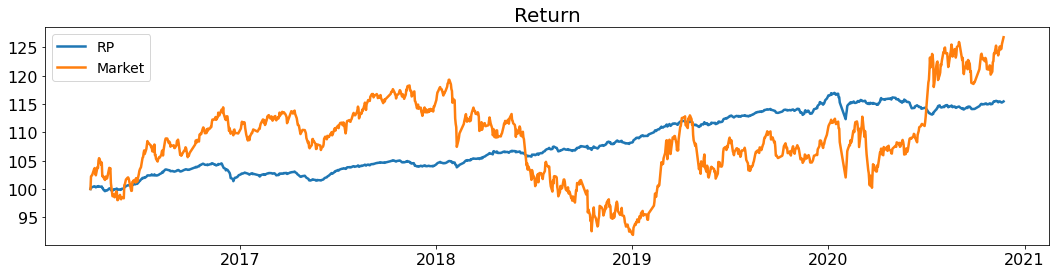

In [31]:
Backtest.Plot2(df_view.index,BT.df_asset,BTM.df_asset,"Return","RP","Market")

In [33]:
df_asset_all = pd.DataFrame({"Date":df_view.index,"RP":BT.df_asset,"Market":BTM.df_asset})
df_asset_all.to_csv("RP_Asset.csv",index=False)